# Анализ данных на Python

*Алла Тамбовцева*

## Практикум по иерархическому кластерному анализу (качественные данные)

### Подготовка к работе

В этом практикуме мы рассмотрим пример кластеризации качественных данных на примере результатов опроса программистов, которые сохранены в файле `coffee_and_code.csv`. 

Переменные в файле:

* `CodingHours` : время, которое респондент тратит на написание кода (число часов в день);
* `CoffeeCupsPerDay`: количество чашек кофе, которое респондент выпивает в день;
* `CoffeeTime`: когда респондент пьет кофе (перед написанием кода, во время написания кода, весь день и прочие варианты);
* `CodingWithoutCoffee`: пишет ли респондент код без кофе (да, нет, иногда);
* `CoffeeType`: тип или марка кофе, предпочитаемые респондентом;
* `CoffeeSolveBugs`: исправляет ли программист баги в коде (да, нет, иногда);
* `Gender`: пол респондента;
* `Country`: страна респондента;
* `AgeRange`: возраст респондента (по категориям).

Импортируем необходимые библиотеки и функции:

* библиотека `pandas` для работы с таблицами;
* функции `linkage`, `dendrogram`, `cut_tree` из набора `hierarchy` модуля `cluster` библиотеки `scipy` для иерархического кластерного анализа.

In [1]:
import pandas as pd
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree, distance

Загрузим данные:

In [2]:
coffee = pd.read_csv("coffee_and_code.csv")

Посмотрим на первые пять строк:

In [3]:
coffee.head()

,CodingHours,CoffeeCupsPerDay,CoffeeTime,CodingWithoutCoffee,CoffeeType,CoffeeSolveBugs,Gender,Country,AgeRange
0,8,2,Before coding,Yes,Caffè latte,Sometimes,Female,Lebanon,18 to 29
1,3,2,Before coding,Yes,Americano,Yes,Female,Lebanon,30 to 39
2,5,3,While coding,No,Nescafe,Yes,Female,Lebanon,18 to 29
3,8,2,Before coding,No,Nescafe,Yes,Male,Lebanon,NaN
4,10,3,While coding,Sometimes,Turkish,No,Male,Lebanon,18 to 29


Несмотря на то, что в данных присутствуют количественные показатели (число времени, уходящее на написание кода и число чашек кофе, выпиваемое за день), остальные показатели представлены в качественной шкале или порядковой шкале с малым числом категорий:

* `CoffeeTime`: качественная шкала, сложно упорядочить все ответы;
* `CodingWithoutCoffee` и `CoffeeSolveBugs`: формально порядковая шкала (`No` < `Sometimes` < `Yes`), но всего три значения;
* `CoffeeType`: тип кофе, точно качественная;
* `Gender`: пол, точно качественная;
* `AgeRange`: формально порядковая шкала, просто возраст разбит на категории.

Выберем для примера три показателя, на основе которых мы будет делить программистов на группы:

* `CoffeeTime`: когда респондент пьет кофе (перед написанием кода, во время написания кода, весь день и прочие варианты);
* `CodingWithoutCoffee`: пишет ли респондент код без кофе (да, нет, иногда);
* `Gender`: пол респондента.

In [4]:
# внешние квадратные скобки – для фильтрации
# внутренние – отграничивают список названий

three = coffee[["CoffeeTime", "CodingWithoutCoffee", "Gender"]]

In [5]:
three.head()

,CoffeeTime,CodingWithoutCoffee,Gender
0,Before coding,Yes,Female
1,Before coding,Yes,Female
2,While coding,No,Female
3,Before coding,No,Male
4,While coding,Sometimes,Male


Самый простой и понятный способ кластеризовать качественные данные – на основе каждого столбца создать набор **фиктивных переменных** или **дамми-переменных**, которые будут принимать значения 0 или 1, а затем, применить к преобразованным данным метод кластеризации, подходящий для бинарных показателей. 

Получить набор **дамми-переменных** в `pandas` можно с помощью функции `get_dummies()`, ей достаточно подать на вход таблицу со столбцами, которые мы хотим представить в виде набора бинарных переменных:

In [6]:
dums = pd.get_dummies(three)

In [7]:
dums

,CoffeeTime_After coding,CoffeeTime_All the time,CoffeeTime_Before and while coding,CoffeeTime_Before coding,CoffeeTime_In the morning,CoffeeTime_No specific time,CoffeeTime_While coding,CodingWithoutCoffee_No,CodingWithoutCoffee_Sometimes,CodingWithoutCoffee_Yes,Gender_Female,Gender_Male
0,0,0,0,1,0,0,0,0,0,1,1,0
1,0,0,0,1,0,0,0,0,0,1,1,0
2,0,0,0,0,0,0,1,1,0,0,1,0
3,0,0,0,1,0,0,0,1,0,0,0,1
4,0,0,0,0,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,0,0,1,0,0,0,0,0,1,0,1
96,0,0,0,1,0,0,0,0,1,0,1,0
97,0,0,0,1,0,0,0,0,0,1,0,1
98,0,0,0,0,0,0,1,0,1,0,1,0


Итак, `pandas` для каждого ответа на каждый вопрос создал набор бинарных столбцов. Для понимания происходящего: первый респондент пьёт кофе перед написанием кода (1 в `CoffeeTime_Before coding`), может писать код без кофе (1 в `CodingWithoutCoffee_Yes`), это женщина (1 в `Gender_Female`). 

### Реализация кластерного анализа

Теперь у нас всё готово к работе. Как мы знаем, для вычисления расстояний на бинарных данных хорошо подходит манхэттенское расстояние (оно же `cityblock`), а оно чаще используется в паре с методом дальнего соседа (метод ближнего соседа имеет явные недостатки, методы с учётом средней связи и центроидов не актуальны, усреднение на бинарных данных – странная затея). Запускаем иерархический анализ с этими параметрами:

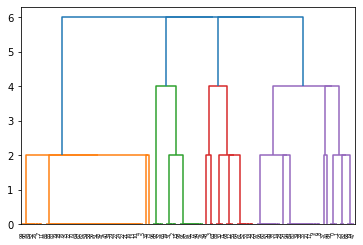

In [9]:
# центировать и нормировать данные не нужно – шкала бинарная, причем у всех показателей

hc2 = linkage(dums, method = "complete", metric = "cityblock")
dendrogram(hc2);

Полученная дендрограмма ничем не отличается от дендрограмм, которые мы получали на количественных данных. Однако она может немного вводить в заблуждение: кажется, что «листьев» с наблюдениями сильно меньше, чем наблюдений (опрошенных всего 100). Ошибки никакой нет, просто есть респонденты, которые абсолютно одинаково ответили на вопросы (два вопроса + указание пола, вполне реалистично), поэтому точки-листья на дендрограмме совпали.

Поделим всех программистов на четыре группы и убедимся, что все на месте:

In [10]:
# получаем метки кластеров
# и сохраняем их в dums

groups = cut_tree(hc2, n_clusters = 4).reshape(-1, )
dums["groups"] = groups

In [11]:
# сколько наблюдений в каждой группе

dums["groups"].value_counts()

3    39
0    30
1    16
2    15
Name: groups, dtype: int64

Да, в сумме 100 человек, никто не потерялся. Посмотрим, что это за группы: сгруппируем все строки по `groups` и выведем среднее по каждой группе, ведь среднее по набору из 0 и 1 – это просто доля 1:

In [12]:
dums.groupby("groups").agg("mean", numeric_only = True)

,CoffeeTime_After coding,CoffeeTime_All the time,CoffeeTime_Before and while coding,CoffeeTime_Before coding,CoffeeTime_In the morning,CoffeeTime_No specific time,CoffeeTime_While coding,CodingWithoutCoffee_No,CodingWithoutCoffee_Sometimes,CodingWithoutCoffee_Yes,Gender_Female,Gender_Male
groups,,,,,,,,,,,,
0,0.066667,0.000000,0.000000,0.366667,0.1,0.033333,0.433333,0.00,0.00,1.0,0.300000,0.700000
1,0.000000,0.000000,0.000000,0.250000,0.0,0.000000,0.750000,0.25,0.75,0.0,1.000000,0.000000
2,0.000000,0.200000,0.200000,0.200000,0.0,0.000000,0.400000,1.00,0.00,0.0,0.066667,0.933333
3,0.000000,0.025641,0.025641,0.179487,0.0,0.000000,0.769231,0.00,1.00,0.0,0.000000,1.000000


Проинтерпретируем полученные кластеры:

* Кластер 0: программисты, которые 100% могут писать код без кофе (доля ответов в `Yes` в `CodingWithoutCoffee` равна 1), чёткой привязки к полу нет (70% мужчин и 30% женщин).

* Кластер 1: программисты-женщины (100% женщин), которые чаще всего пьют кофе во время написания кода (доля ответов `While coding` в `CoffeeTime` равна 0.75).

* Кластер 2: преимущественно программисты-мужчины (93% мужчин), которые никогда не пишут код без кофе (доля ответов `No` в `CodingWithoutCoffee` равна 1).

* Кластер 3: программисты-мужчины (100% мужчин), которые иногда пишут код без кофе. 

Полученную информацию можно использовать для дальнейшего анализа (почему люди в первой группе не пьют кофе? пьют чай или у них просто работоспособность и без этого хорошая?) или разработки разных маркетинговых и рекламных стратегий (если хотим разместить рекламу кофе рядом с офисом, на кого она должна быть больше ориентирована?).

**Дополнительно.** Иногда кластеризацию можно использовать для сравнения результатов группировки на основе данных и содержательных соображений. В данном случае мы можем поставить такой вопрос: отличается ли поведение программистов-женщин и программистов-мужчин, и если да, насколько это выражается в ответах на вопросы, связанные с написанием кода и потреблением кофе?

Как ответить на этот вопрос, используя кластерный анализ? Забрать все ответы на вопросы, исключая пол и другие демографические характеристики, реализовать на них кластерный анализ, поделить респондентов на две группы и проверить, правда ли, что полученные группы состоят из представителей одного пола.

Выберем пару столбцов-вопросов о кодинге и кофе:

In [13]:
new = coffee[["CoffeeTime", "CodingWithoutCoffee"]]
dums_new = pd.get_dummies(new)

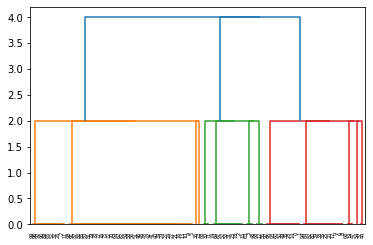

In [14]:
hc3 = linkage(dums_new, method = "complete", metric = "cityblock")
dendrogram(hc3);

Чисто по дендрограмме сложно выделить две группы (их явно три), но формально такое возможно:

In [15]:
groups2 = cut_tree(hc3, n_clusters = 2).reshape(-1, )

# добавляем столбец в исходный coffee, 
# там была информация по полу

coffee["groups2"] = groups2

In [16]:
# отбираем строки для каждой группы

cluster0 = coffee[coffee["groups2"] == 0]
cluster1 = coffee[coffee["groups2"] == 1]

Смотрим на соотношение по полу в каждой группе:

In [17]:
cluster0["Gender"].value_counts()

Male      35
Female    14
Name: Gender, dtype: int64

In [18]:
cluster1["Gender"].value_counts()

Male      39
Female    12
Name: Gender, dtype: int64

Нельзя сказать, что один кластер состоит преимущественно из мужчин, а другой – преимущественно из женщин, состав смешанный. Значит, разнообразие ответов на вопросы о времени потребления кофе (`CoffeeTime`) и о том, кодят ли программисты без кофе (`CodingWithoutCoffee`) нельзя связать с полом респондента. 

P.S. Понятно, что вопрос о независимости/зависимости признаков в качественной шкале спокойно можно решить через использование таблиц сопряжённости и критерий хи-квадрат, но классические таблицы сопряжённости всё же двумерные, а здесь мы можем учесть сколько угодно признаков одновременно.

### Дополнение: смешанные данные

Логичный вопрос: а как быть, если часть данных в количественной шкале, а часть – в качественной? Есть два пути:

* использовать метрику и метод агрегирования, которые универсальны; например, можно выбрать столбцы с количественными показателями, выполнить их шкалирование (центрирование и нормирование), добавить к ним набор дамми-переменных, созданный на основе качественных показателей, а затем реализовать кластерный анализ, используя манхэттенское расстояние и метод дальнего соседа (годятся и для бинарных, и для небинарных данных);

* использовать специальные меры для смешанных данных, например, [расстояние Гувера](https://pypi.org/project/gower/#:~:text=Gower%20Distance%20is%20a%20distance,Biometrics%2027%20857%E2%80%93874.) (*Gower distance*); на самом деле, логика та же, что и выше, просто используются взвешенные сочетания разных типов расстояний, подходящих для конкретного типа данных.